<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/Class_task_handout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline


# Döntési felületek tanulmányozása az Iris adatsoron

Köszönjük a Scikitnek [ezt](https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html) a demo-t, amiből kiindulhatunk.

[Iris](https://archive.ics.uci.edu/ml/datasets/iris)-t ismerjük.

Két feature-re koncentrálunk:

- Sepal length
- Sepal width


In [48]:
import numpy as np
import matplotlib.pyplot as plt

#Még szerencse, hogy az Iris egykönnyen betölthető :-)
from sklearn import datasets

# Kölcsönvesszük a Scikit plotting megoldását. :-)

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [49]:
# Hát mondom én, hogy könnyű betölteni! :-)
iris = datasets.load_iris()

# Az első két featurte-re korlátozzuk magunkat.
X = iris.data[:, :2]
y = iris.target

# Feladat:

A `models` listában hozzunk létre Scikit model példányokat paraméterekkel, hozzájuk kapcsolódóan grafikon címeket pedig a `titles` listában. 

A modellek között szerepeljen:
- egyszerű logisztikus regresszió
- Lineáris support vector classifier
- Support vector modell 3-ad fokú polinóm kernellel
- Random forest, 2 fából
- Random forest 50 fából

(Jelenleg a plot max 6 modellre van beáálítva, ez persze módosítható.)

In [53]:
#Itt importáljuk be a szükséges osztályozókat:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

...

#Ide tegyük a modell instanciáinkat (paraméterekkel)

LR=LogisticRegression()
SV_lin=SVC()
SV_2=SVC(kernel="poly", degree=3)
RF2=RandomForestClassifier(n_estimators=2,)
RF50=RandomForestClassifier(n_estimators=50)
RF100=RandomForestClassifier(n_estimators=200)

models=(LR,SV_lin,SV_2,RF2,RF50,RF100)
... 

# Ide tegyük a modelleink neveit stringek listájaként, hogy szép grafikonunk legyen! ;-)
# Vigyázzunk, ne használjunk méter hosszú neveket, mert a plot nem bírja, és az utolsót nem rakja ki...
titles=["LR","SVC","SVC_poly","RF2","RF50","RF100"]
...

Ellipsis

In [54]:
# Itt történik a "mágia", iteratívan végighívjuk az adatra a modelleket.
models = [clf.fit(X, y) for clf in models]

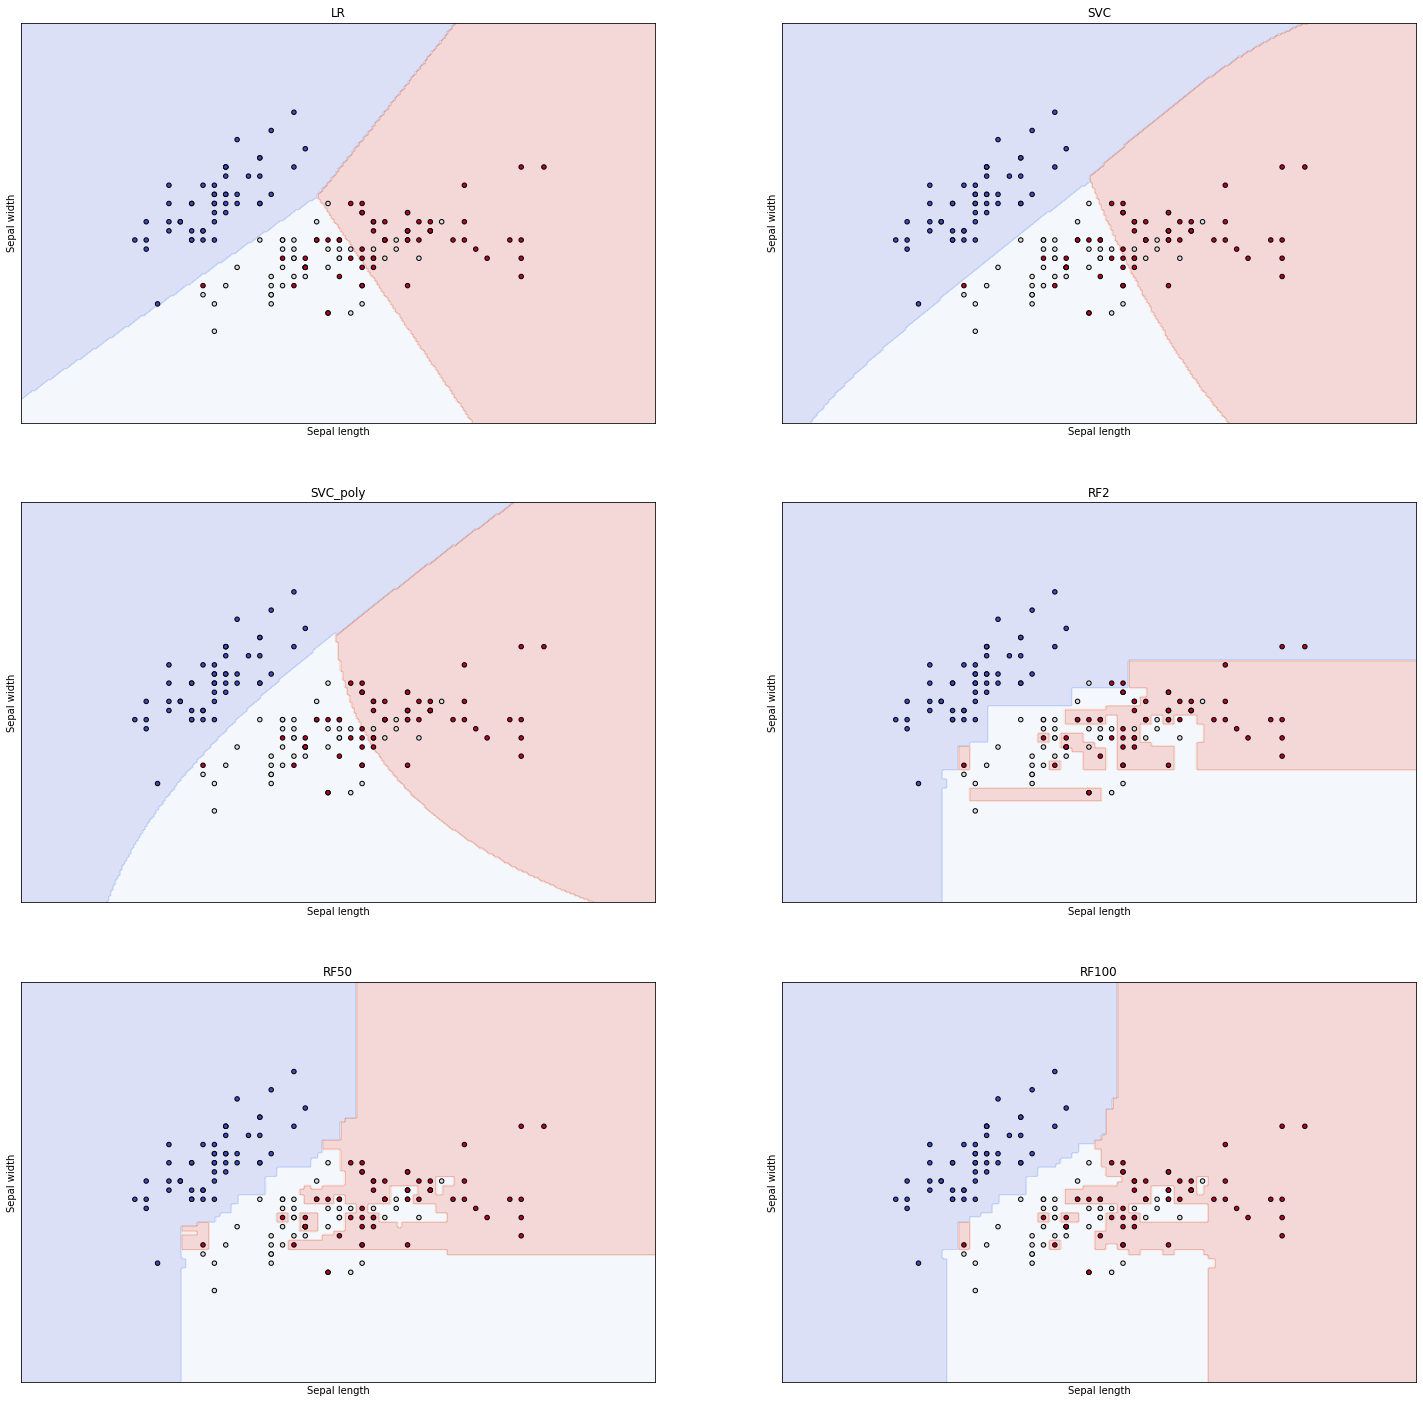

In [56]:
fig, sub = plt.subplots(3, 2, figsize=(25,25))
           
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.2)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k',)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Feladat:

Ha készen vagyunk, vitassuk meg a tanulásgokat!